# CS170A -- HW#1 -- assignment and solution form -- Python

Your name:  _Zhengkai Zhang_____________________

Your UID:  604582162_

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## NOTE:  In this assignment we provide pseudocode to get you started.

In later assignments we will not do this.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import arange,array,ones,linalg
%matplotlib inline

In [7]:
import numpy as np
from numpy import diag
import scipy as sp
from numpy.linalg import svd
import scipy.stats as spstats

In [8]:
import pandas as pd

X = pd.read_csv('mandrill_X.csv', header=None).as_matrix()
X.shape

map = pd.read_csv('mandrill_map.csv', header=None).as_matrix()
map.shape

def map_R(i): return map[i-1,0]

def map_G(i): return map[i-1,1]

def map_B(i): return map[i-1,2]

ind2r = np.vectorize(map_R)   # apply the map_R function to every member of an array
ind2g = np.vectorize(map_G)   # apply the map_G function to every member of an array
ind2b = np.vectorize(map_B)   # apply the map_B function to every member of an array

def ind2rgb(X):
    return np.stack( [ind2r(X), ind2g(X), ind2b(X)], axis=2)

Mandrill = ind2rgb(X)
Mandrill.shape

(480, 500, 3)

In [9]:
GrayMandrill = np.mean( Mandrill, axis=2 )
GrayMandrill.shape

(480, 500)

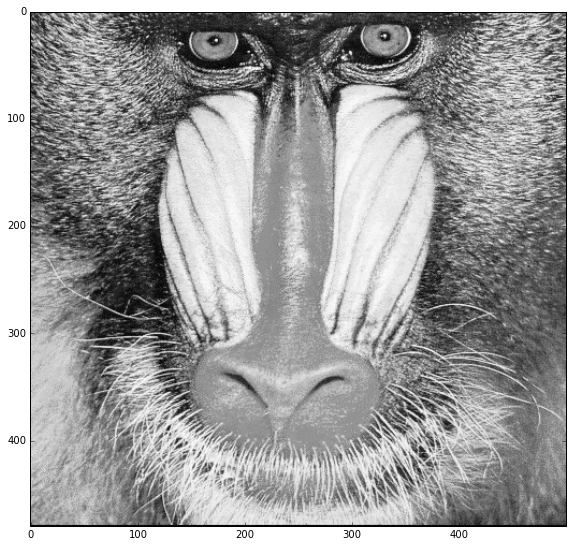

In [10]:
plt.rcParams['figure.figsize'] = (9.6,10.0)

plt.imshow(GrayMandrill, cmap="Greys_r")
# strange default cmap; see:  http://matplotlib.org/users/image_tutorial.html
plt.show()

# Problem 1:  SVD k-th order approximations (30 points)

If $A$ is a matrix that has SVD $A = U\,S\,V'$,
the <b>rank-k approximation of $A$</b>
keeping only the first $k$ columns of the SVD.

Specifically, given a $n \times p$ matrix $A$ with SVD $A = U\,S\,V'$,
then if $k \leq n$ and $k \leq p$, the rank-$k$ approximation of $A$ is
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V'
$$
where $S^{(k)}$ is the result of setting all diagonal elements to zero after the first $k$ entries
$(1 \leq k \leq p)$.
If $U^{(k)}$ and $V^{(k)}$ are like $U$ and $V$ but with all columns zero after the first $k$, then
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V' ~~=~~ U^{(k)} ~ S^{(k)} ~ V^{(k)'} .
$$


In class, we saw a demo of the attached Matlab script <tt>imagesvdgui.m</tt>
--- and the effectiveness of this approximation in retaining information about an image.

The goal of this problem is to implement this approximation
for black-and-white (grayscale) images.

In [203]:
def full_svd(A):
    U, sigma, VT = np.linalg.svd(A, full_matrices=True)
    n, p = A.shape
    S = np.zeros((n,p))
    k = min(n,p)
    S[:k,:k] = np.diag(sigma)
    return (U, S, VT.T)

###  1.(a):  Plot Singular Values of the Rank-$k$ Approximation of an Image

As in HW0, construct a grayscale version of the Mandrill image,
and take one of the 3 color planes as a 500x480 matrix.
This is our `black and white' image $A$.
You are to analyze the rank-k approximation of the image.

Compute the SVD of $A$, and plot the singular values $\sigma_1$, $\sigma_2$, ...

In [204]:
A = GrayMandrill

U, S, V = full_svd(A)    # U, S, V are now the SVD of A

np.linalg.norm( A - U.dot(S).dot(V.T) )  #  A should match the product of U, S, V'

1.8195144052850584e-12

1


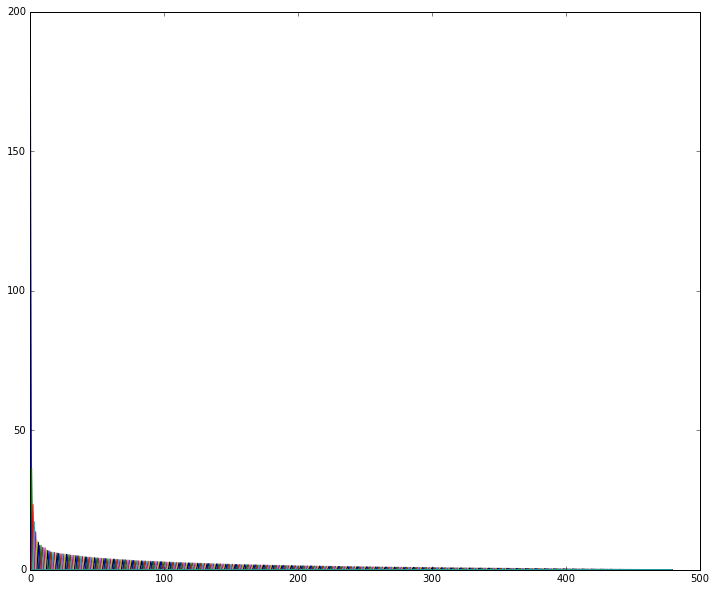

In [250]:
U, S, V = full_svd(A)    # U, S, V are now the SVD of A
plt.plot(S)
print(1)


###  1.(b):  Optimal Rank-$k$ Approximation of an Image

Find the value of $k$ that minimizes $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~+~ k$.

In [176]:
def svds(A,k):
    U,sigma,VT = svd(A, full_matrices=True)
    n, p = A.shape
    if k > min(n,p):  k = min(n,p)
    S = diag(sigma[:k])
    return (U[:,:k], S, VT.T[:,:k])

In [212]:
n, p = A.shape
maximum_possible_k = min(n,p)
mins=9223372036854775807
index =0
for k in range(maximum_possible_k):
    U, S, V = svds(A, k)
    check = np.linalg.norm( A - U.dot(S).dot(V.T) )**2 +k
    if (check < mins):
        mins = check
        index = k
index

265

###  1.(c):  The Rank-$k$ Approximation is a Good Approximation

In the chapter on the SVD, the course reader presents a derivation for $A \, - \, A^{(k)}$:
$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\end{eqnarray*}$$

Prove the following:
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$


#### Proof  (Enter your Proof here)
Because
$A \; - \; A^{(k)} ~ = ~ U \; (S ~ - ~ S^{(k)}) \; V '$,
..............

As a result, $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~ = ~ ...$

Therefore
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$

#### Proof  (Enter your Proof here)
Because
$A \; - \; A^{(k)} ~ = ~ U \; (S ~ - ~ S^{(k)}) \; V '~ let ~ X = A \; - \; A^{(k)} $,

....
As a result, let $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~ = ~$$~\mid\mid{X \;}\mid\mid^2_{F} ~=~ \sqrt{\sum_{i=1}^{n}\sum_{j=1}^{m} [a_ij]^2} ~=~ \sqrt{trace(X 'X)} ~=~ \sqrt{trace(~ V \; (S ~ - ~ S^{(k)}) \; U'~ U \; (S ~ - ~ S^{(k)}) \; V ')}~=~\sqrt{trace(~ (S ~ - ~ S^{(k)}) \;(S ~ - ~ S^{(k)}) \;)}~=~\sqrt{trace(~ (S ~ - ~ S^{(k)}))^2} = trace(~ (S ~ - ~ S^{(k)}))$ 
$Since S \; - \; S^{(k)} ~ will~be~equal~to~all~element~in~S~from~k~to~the~end,~so~result~will~be~\sum_{i>k} \sigma_i^2  $

Therefore
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$

# Problem 2:  Baseball Visualization (40 points)

For this dataset you are given a matrix of statistics for Baseball players.
You are to perform two kinds of analysis on this matrix.

### Read in the Baseball Statistics

Statistics of top players after the last regular season game,
obtained from MLB.com, October 2016.

In [14]:
from Baseball_Players_2016 import *

## execute Baseball_Players_2016.py  to load in the data needed here

In [15]:
print(StatNames.shape)

StatNames[1:4]

(17,)


array(['G', 'AB', 'R'], 
      dtype='<U4')

In [16]:
print(Stats.shape)

(146, 17)


In [17]:
df = pd.DataFrame(Stats)
df.columns = StatNames

df.head()

,Rank,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,1.0,146.0,552.0,104.0,192.0,32.0,8.0,11.0,66.0,66.0,80.0,11.0,7.0,0.348,0.416,0.495,0.911
1,2.0,142.0,531.0,88.0,184.0,47.0,5.0,25.0,104.0,35.0,57.0,5.0,3.0,0.347,0.390,0.595,0.985
2,3.0,161.0,640.0,108.0,216.0,42.0,5.0,24.0,96.0,60.0,70.0,30.0,10.0,0.338,0.396,0.531,0.928
3,4.0,158.0,556.0,101.0,181.0,34.0,2.0,29.0,97.0,108.0,120.0,8.0,1.0,0.326,0.434,0.550,0.985
4,5.0,143.0,578.0,111.0,187.0,35.0,5.0,29.0,82.0,43.0,102.0,17.0,9.0,0.324,0.381,0.552,0.933


In [18]:
print(PlayerNames.shape)

PlayerNames[1:4]

(146,)


array(['Murphy D', 'Altuve J', 'Votto J'], 
      dtype='<U13')

### Compute a "scaled" version of the Stats matrix

We scale each column of values ${\bf x}$ in Stats
to be  ${\bf z} = ({\bf x}-\mu)/\sigma$ in ScaledStats,
where $\mu$ is the mean of the ${\bf x}$ values, and $\sigma$ is their standard deviation.

In Octave/Matlab, the function <tt>mean()</tt> computes column means,
and <tt>std()</tt> computes standard deviations.
The function <tt>zscore()</tt> computes both,
and uses them to "scale" each column in this way.

This scaling is also called __normalization__ and __standardization__.
The __z-scores__ ${\bf z} = ({\bf x}-\mu)/\sigma$ are also called
the standardized or normalized values for ${\bf x}$.

In [19]:
ScaledStats  =  spstats.zscore(Stats, axis=1, ddof=1);   #  z  =  (x-mu)/sigma

np.mean(ScaledStats, axis=1)  #  the means of each column after normalization should be 0
np.std(ScaledStats, axis=1).shape   #  the standard deviations of each column after normalization should be 1

(146,)

### 2 (a):  Random Projections
 
A fundamental problem in data science is that it is impossible to visualize a dataset that has many features.  Given an $n \times p$ dataset (matrix) $A$ in which the number of features $p$ is large, there is no obvious way to plot the data.

_Dimensionality reduction_ algorithms have been developed that attempt to find datasets that have lower values of $p$ but approximate $A$ in some way.  Although there are sophisticated algorithms, a competitive approach is to compute a ___random projection___ of $A$ into a few dimensions.  When the projection is into 2 or 3 dimensions, the result can be visualized.

A ___random $k$-D projection___ of a $n \times p$ dataset (matrix) $A$ is the result $(A \, P)$ of multiplying $A$ on the right by a $p \times k$ matrix $P$ of random values.

The result is a $n \times k$ matrix, assigning each row in $A$ a new pair of values $(x,y)$, and these can be interpreted as positions in a 2D plot.

In [20]:
IrisLines = open('iris.csv','r').read().split('\n')[1:]  # skip header line

Iris = np.array([[float(x) for x in line.split(',')] for line in IrisLines if len(line)>0])

A = Iris[:, 0:4];  # just the measurement columns

print(A.shape)

(150, 4)


random projection weights:
[[ 0.93572916  0.63110943]
 [ 0.79574633  0.37409792]
 [ 0.1260743   0.47145035]
 [ 0.03204021  0.82000128]]


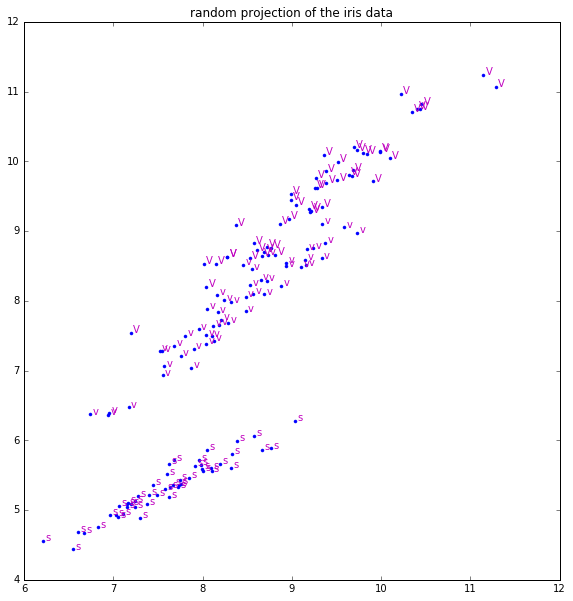

In [21]:
n, p = A.shape

P = np.random.rand(p,2)
print('random projection weights:')
print(P)
XY = A.dot(P)
plt.plot(XY[:,0], XY[:,1], 'b.')
plt.title('random projection of the iris data')
species = ['s', 'v', 'V']
for i in range(n):
    plt.annotate( species[int(Iris[i,4]-1)], (XY[i,0]+0.025, XY[i,1]), color="m")

___Problem:___ write a function <tt>random_projection(A,k)</tt> that, given an input matrix $A$ of size $n \times p$ and an integer $k>0$, produces a random $k$-D projection.

Please use uniform random values in the matrix $P$.

Then:  plot the result of 3 random 2D projections of the data. 

In each plot, identify the ___greatest outlier___ -- the player with $(x,y)$ values that have the largest total $x+y$.  Print the row in the dataset whose projection is this outlier.

In [286]:
color = [
        'b.',
        'r.',
        'g.',
        ]

In [287]:
def random_projection(A,k):
    #plt.figure(1)
    #fig, axes = plt.subplots(3, 1)
    text_offset = 0.01
    result = 0
    nX = A.shape[0]
    for i in range(3):
        P = np.random.uniform(A.shape[1],k)
        XY = A.dot(P)
        XplusY = np.sum(XY, axis=1) #sum of each cols in XY
        plt.figure()
        plt.plot(XY[:,0], XY[:,1], color[i]) # plot XY
        record = df.ix[1:,1]
        for i in range(nX):
            plt.text( XY[i,0], XY[i,1],PlayerNames[i])
            plt.text( XY[i,0], XY[i,1]+0.12,i)
        plt.title( 'Basketball Player and Rank' )
        length = XplusY.size
        maxl = max(XplusY)
        index = -1
        for j in range(length):
            if (XplusY[j] ==maxl):
                index= j
                break
        print("outerlier row in dataset: ")
        print(df.ix[index,:])

outerlier row in dataset: 
Rank    117.000
G       151.000
AB      523.000
R        81.000
H       130.000
2B       31.000
3B        9.000
HR       29.000
RBI      91.000
BB       64.000
SO      154.000
SB        6.000
CS        1.000
AVG       0.249
OBP       0.332
SLG       0.509
OPS       0.840
Name: 116, dtype: float64
outerlier row in dataset: 
Rank      2.000
G       142.000
AB      531.000
R        88.000
H       184.000
2B       47.000
3B        5.000
HR       25.000
RBI     104.000
BB       35.000
SO       57.000
SB        5.000
CS        3.000
AVG       0.347
OBP       0.390
SLG       0.595
OPS       0.985
Name: 1, dtype: float64
outerlier row in dataset: 
Rank      2.000
G       142.000
AB      531.000
R        88.000
H       184.000
2B       47.000
3B        5.000
HR       25.000
RBI     104.000
BB       35.000
SO       57.000
SB        5.000
CS        3.000
AVG       0.347
OBP       0.390
SLG       0.595
OPS       0.985
Name: 1, dtype: float64


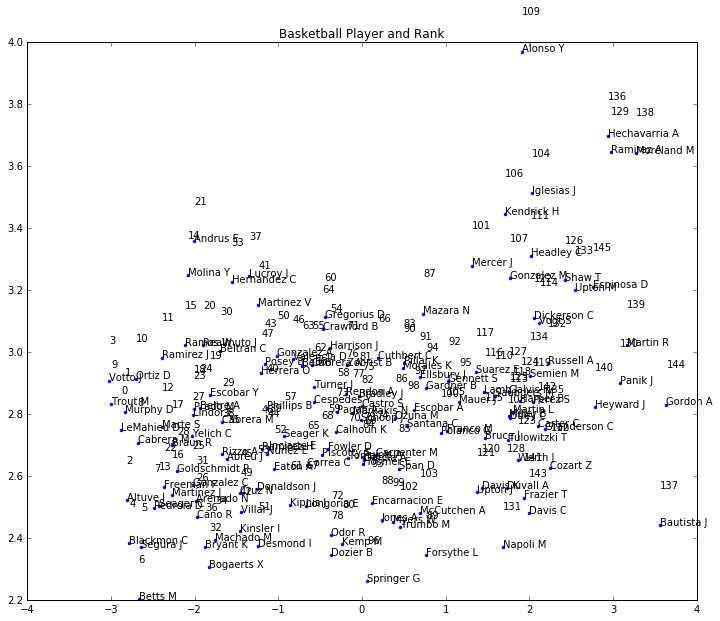

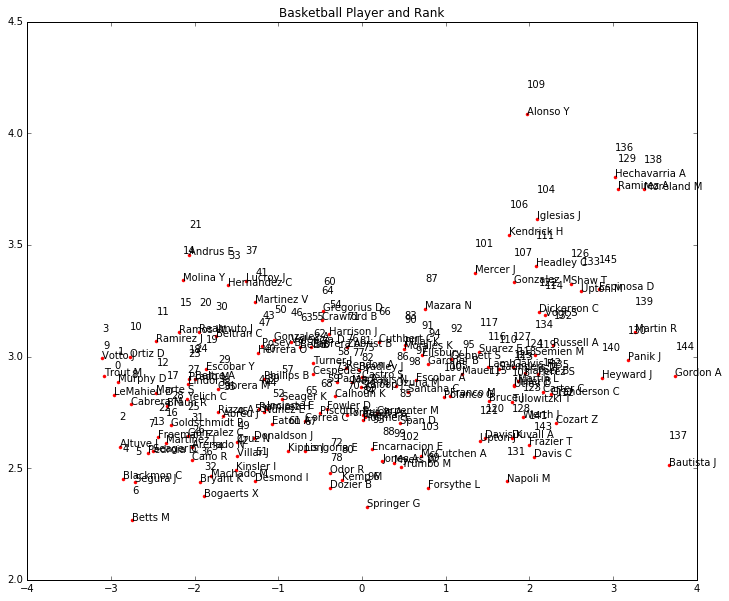

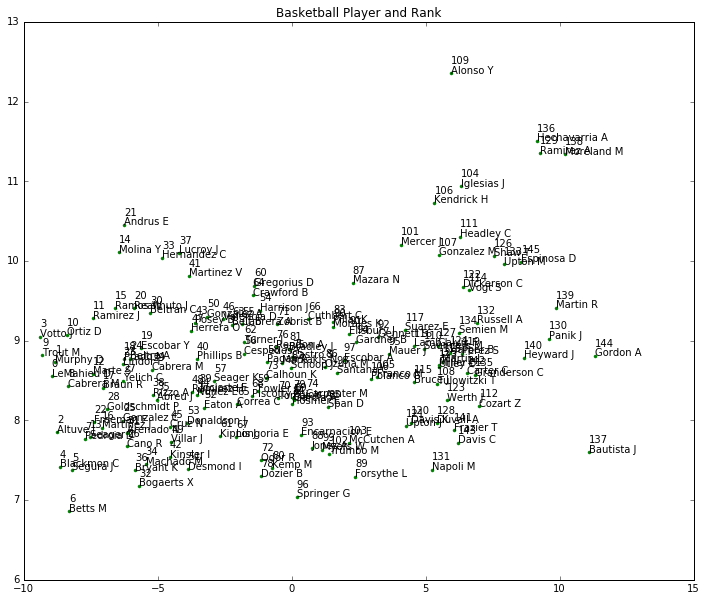

In [288]:
random_projection(ScaledStats,2)


### 2 (b): Latent Semantic Analysis

The course reader describes __Latent Semantic Indexing__
for a matrix of values measuring association between X terms vs. Y terms.

The classic example is a "term/document matrix" for Keywords vs. Books, shown below.
The code shown produces an LSI plot for the data.

__Your job is to produce an analogous LSI plot for the table of Baseball players.__

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

Some LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

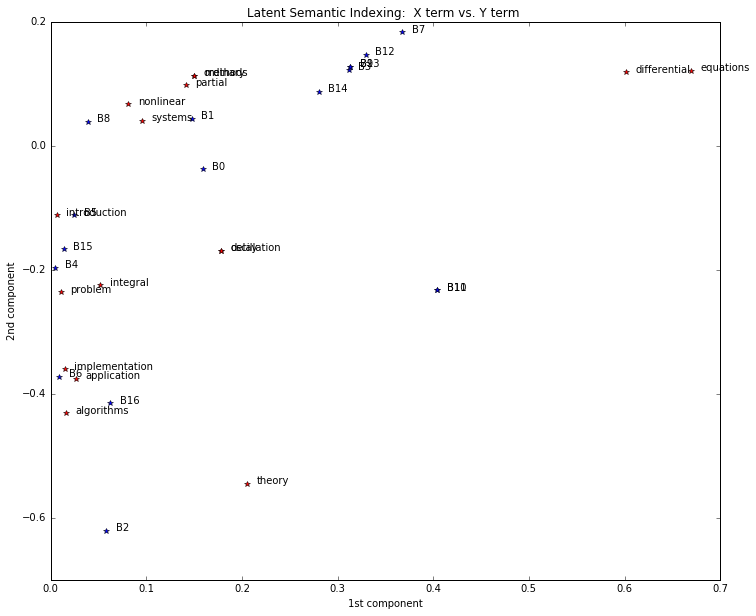

In [259]:
# X:  Keywords

nX = 16
Xtext = [
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        ]

# Y:  Books

nY = 17

# Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
#--------------------------------------------------------------------------
coOccurrence =  np.array([
      [ 0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # algorithms
      [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1 ],  # application
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0 ],  # delay
      [ 0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0 ],  # differential
      [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0 ],  # equations
      [ 0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # implementation
      [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1 ],  # integral
      [ 0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],  # introduction
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0 ],  # methods
      [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0 ],  # nonlinear
      [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0 ],  # ordinary
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0 ],  # oscillation
      [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ],  # partial
      [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0 ],  # problem
      [ 0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0 ],  # systems
      [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1 ]   # theory
])

U, S, V = full_svd(coOccurrence)

Xfactor = U[:,:2]
Yfactor = V[:,:2]

# plot the 2D projection of the data

plt.rcParams['figure.figsize'] = (12,10)

text_offset = 0.01
plt.plot( Xfactor[:,0], Xfactor[:,1], 'r*',  Yfactor[:,0], Yfactor[:,1], 'b*' )
plt.hold()

for i in range(nX):
     plt.text( Xfactor[i,0]+text_offset, Xfactor[i,1], Xtext[i])

for i in range(nY):
     plt.text( Yfactor[i,0]+text_offset, Yfactor[i,1], ('B%d' % i))

plt.title( 'Latent Semantic Indexing:  X term vs. Y term ' )
plt.xlabel( '1st component' )
plt.ylabel( '2nd component' )


plt.hold()

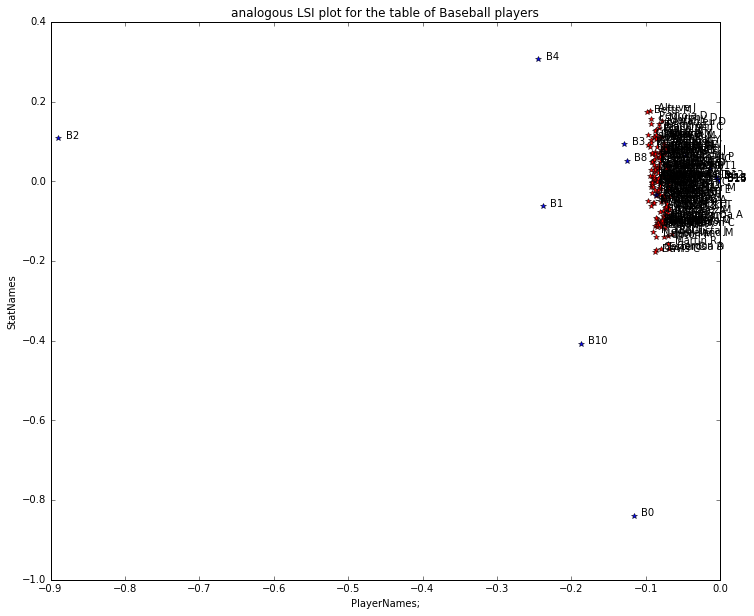

In [147]:


# X:  Keywords

nX  = PlayerNames.shape[0]
MYXtext = PlayerNames.T

# Y:  Books

nY = StatNames.shape[0]

# Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
#--------------------------------------------------------------------------
lists =  np.array([
      df.ix[0,:], 
      df.ix[1,:],
      df.ix[2,:], 
      df.ix[3,:],
      df.ix[4,:], 
      df.ix[5,:],
      df.ix[6,:],
      df.ix[7,:], 
      df.ix[8,:],
      df.ix[9,:], 
      df.ix[10,:], 
      df.ix[11,:],
      df.ix[12,:], 
      df.ix[13,:],
      df.ix[14,:], 
      df.ix[15,:],
      df.ix[16,:],
      df.ix[17,:], 
      df.ix[18,:],
      df.ix[19,:], 
      df.ix[20,:], 
      df.ix[21,:],
      df.ix[22,:], 
      df.ix[23,:],
      df.ix[24,:], 
      df.ix[25,:],
      df.ix[26,:],
      df.ix[27,:], 
      df.ix[28,:],
      df.ix[29,:], 
      df.ix[30,:], 
      df.ix[31,:],
      df.ix[32,:], 
      df.ix[33,:],
      df.ix[34,:], 
      df.ix[35,:],
      df.ix[36,:],
      df.ix[37,:], 
      df.ix[38,:],
      df.ix[39,:],
      df.ix[40,:], 
      df.ix[41,:],
      df.ix[42,:], 
      df.ix[43,:],
      df.ix[44,:], 
      df.ix[45,:],
      df.ix[46,:],
      df.ix[47,:], 
      df.ix[48,:],
      df.ix[49,:], 
      df.ix[50,:], 
      df.ix[51,:],
      df.ix[52,:], 
      df.ix[53,:],
      df.ix[54,:], 
      df.ix[55,:],
      df.ix[56,:],
      df.ix[57,:], 
      df.ix[58,:],
      df.ix[59,:], 
      df.ix[60,:], 
      df.ix[61,:],
      df.ix[62,:], 
      df.ix[63,:],
      df.ix[64,:], 
      df.ix[65,:],
      df.ix[66,:],
      df.ix[67,:], 
      df.ix[68,:],
      df.ix[69,:], 
      df.ix[70,:], 
      df.ix[71,:],
      df.ix[72,:], 
      df.ix[73,:],
      df.ix[74,:], 
      df.ix[75,:],
      df.ix[76,:],
      df.ix[77,:], 
      df.ix[78,:],
      df.ix[79,:],
      df.ix[80,:], 
      df.ix[81,:],
      df.ix[82,:], 
      df.ix[83,:],
      df.ix[84,:], 
      df.ix[85,:],
      df.ix[86,:],
      df.ix[87,:], 
      df.ix[88,:],
      df.ix[89,:], 
      df.ix[90,:], 
      df.ix[91,:],
      df.ix[92,:], 
      df.ix[93,:],
      df.ix[94,:], 
      df.ix[95,:],
      df.ix[96,:],
      df.ix[97,:], 
      df.ix[98,:],
      df.ix[99,:], 
      df.ix[100,:], 
      df.ix[101,:],
      df.ix[102,:], 
      df.ix[103,:],
      df.ix[104,:], 
      df.ix[105,:], 
      df.ix[106,:],
      df.ix[107,:], 
      df.ix[108,:],
      df.ix[109,:], 
      df.ix[110,:],
      df.ix[111,:], 
      df.ix[112,:],
      df.ix[113,:], 
      df.ix[114,:], 
      df.ix[115,:],
      df.ix[116,:], 
      df.ix[117,:],
      df.ix[118,:],
      df.ix[119,:],
      df.ix[120,:], 
      df.ix[121,:],
      df.ix[122,:], 
      df.ix[123,:],
      df.ix[124,:], 
      df.ix[125,:],
      df.ix[126,:], 
      df.ix[127,:], 
      df.ix[128,:],
      df.ix[129,:], 
      df.ix[130,:],
      df.ix[131,:],
      df.ix[132,:], 
      df.ix[133,:],
      df.ix[134,:], 
      df.ix[135,:], 
      df.ix[136,:],
      df.ix[137,:], 
      df.ix[138,:],
      df.ix[139,:], 
      df.ix[140,:], 
      df.ix[141,:], 
      df.ix[142,:],
      df.ix[143,:], 
      df.ix[144,:],
      df.ix[145,:]
])
U, S, V = full_svd(lists)

Xfactor = U[:,:2]
Yfactor = V[:,:2]

# plot the 2D projection of the data

plt.rcParams['figure.figsize'] = (12,10)

text_offset = 0.01
plt.plot( Xfactor[:,0], Xfactor[:,1], 'r*',  Yfactor[:,0], Yfactor[:,1], 'b*' )
plt.hold()

for i in range(nX):
     plt.text( Xfactor[i,0]+text_offset, Xfactor[i,1], MYXtext[i])

for i in range(nY):
     plt.text( Yfactor[i,0]+text_offset, Yfactor[i,1], ('B%d' % i))

plt.title( 'analogous LSI plot for the table of Baseball players' )
plt.xlabel( 'PlayerNames;' )
plt.ylabel( 'StatNames' )

In [145]:
MYXtext

array(['LeMahieu D', 'Murphy D', 'Altuve J', 'Votto J', 'Blackmon C',
       'Segura J', 'Betts M', 'Pedroia D', 'Cabrera M', 'Trout M',
       'Ortiz D', 'Ramirez J', 'Marte S', 'Seager C', 'Molina Y',
       'Ramos W', 'Martinez J', 'Braun R', 'Prado M', 'Escobar Y',
       'Realmuto J', 'Andrus E', 'Freeman F', 'Lindor F', 'Beltre A',
       'Gonzalez C', 'Cano R', 'Yelich C', 'Goldschmidt P', 'Cabrera M',
       'Beltran C', 'Arenado N', 'Bogaerts X', 'Hernandez C', 'Machado M',
       'Abreu J', 'Bryant K', 'Lucroy J', 'Rizzo A', 'Inciarte E',
       'Phillips B', 'Martinez V', 'Kinsler I', 'Posey B', 'Nunez E',
       'Cruz N', 'Valencia D', 'Herrera O', 'Ramirez H', 'Villar J',
       'Gonzalez A', 'Desmond I', 'Eaton A', 'Donaldson J', 'Harrison J',
       'Cabrera A', 'Cespedes Y', 'Seager K', 'Pagan A', 'Fowler D',
       'Gregorius D', 'Kipnis J', 'Turner J', 'Belt B', 'Crawford B',
       'Correa C', 'Cuthbert C', 'Longoria E', 'Piscotty S', 'Garcia A',
       'Tomas Y', 'Z

In [42]:
random_projection = lambda A,k: 0 # fill in using e.g.:   ... rand(size(A,1),k) ...

for i in range(3):
    XY = random_projection( ScaledStats, 2 )
    XplusY = np.sum(XY, axis=0)
    
#   plt.plot( something_involving_XY )
#   # plt.text( something_involving_XY, PlayerNames, 'fontsize', 10 )
#   plt.text( something_involving_XY, PlayerRanks, 'fontsize', 10 )
#   greatest_outlier = something_involving_XplusY # ... (XplusY == max(XplusY)) ...

# Problem 3: Global Warming again  (30 points)

In HW0, you plotted the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

In this problem we want you to fit linear models through the data.

In [290]:
import pandas as pd

GHCN = pd.read_csv('ghcn.csv', header=None).fillna(0).as_matrix()

#   The data was artificially shifted to [0, 4500]
#     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
#     Since our focus here is on warming, we ignore temperatures below -5.
#   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN[:,2:74] - 2500.0) / 100.0                        # omit the first two columns
GHCN_in_centigrade.shape

(59184, 72)

In [291]:
temperature_anomaly = np.reshape( GHCN_in_centigrade, (36, 12, 137, 72), order="F" )
# convert to a 4D matrix, so we can use slices; use Fortran conventions, like Matlab

temperature_anomaly.shape

(36, 12, 137, 72)

In [292]:
number_of_all_GHCN_values = np.prod( temperature_anomaly.shape )
number_of_all_GHCN_values

4261248

In [293]:
missing_values     = (temperature_anomaly == -25)
non_missing_values = (temperature_anomaly != -25)

number_of_missing_values = missing_values.sum()
number_of_missing_values

3620065

In [294]:
maximum_anomaly_value = temperature_anomaly.max()
maximum_anomaly_value
minimum_anomaly_value = temperature_anomaly[non_missing_values].min()
minimum_anomaly_value

-24.260000000000002

In [295]:
US_latitude  = np.arange(8,12)
US_longitude = np.arange(14,21)
my_years = np.arange(1916,2016)
my_year_indices = np.arange(1916-1880,2016-1880)
temperature_anomaly[US_latitude][:,6,136,US_longitude]  # example: anomaly in the US for July 2016
my_slice = temperature_anomaly[ US_latitude ][ :, :, my_year_indices][ :, :, :, US_longitude ]
my_slice.shape

(4, 12, 100, 7)

In [296]:
total_number_of_grid_squares = len(US_latitude) * len(US_longitude) * 12
N = total_number_of_grid_squares
N

336

In [297]:
average_US_anomaly_by_year = np.reshape( my_slice.sum(axis=3).sum(axis=1).sum(axis=0), (len(my_years), 1) ) / N
# order="F" is not needed for this reshape since the result is a vector

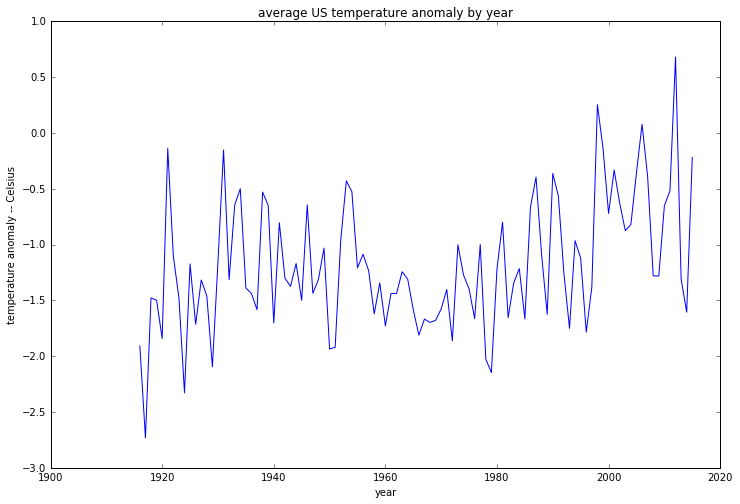

In [298]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot( my_years, average_US_anomaly_by_year )
plt.xlabel('year')
plt.ylabel('temperature anomaly -- Celsius')
plt.title('average US temperature anomaly by year')
plt.show()

### (a) Global Average Temperature Anomaly:  Linear Model (Least Squares)

___Problem:___ fit a line through the data, using Least Squares.

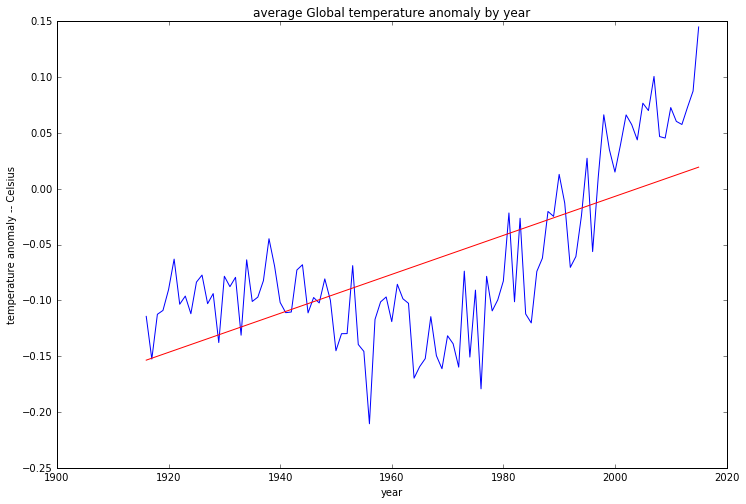

In [306]:
import pandas as pd
GHCN = pd.read_csv('ghcn.csv', header=None).fillna(0).as_matrix()

#   The data was artificially shifted to [0, 4500]
#     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
#     Since our focus here is on warming, we ignore temperatures below -5.
#   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN[:,2:74] - 2500.0) / 100.0                        # omit the first two columns
GHCN_in_centigrade.shape
temperature_anomaly = np.reshape( GHCN_in_centigrade, (36, 12, 137, 72), order="F" )
# convert to a 4D matrix, so we can use slices; use Fortran conventions, like Matlab

temperature_anomaly.shape
number_of_all_GHCN_values = np.prod( temperature_anomaly.shape )
number_of_all_GHCN_values
missing_values     = (temperature_anomaly == -25)
non_missing_values = (temperature_anomaly != -25)

number_of_missing_values = missing_values.sum()
number_of_missing_values
maximum_anomaly_value = temperature_anomaly.max()
maximum_anomaly_value
minimum_anomaly_value = temperature_anomaly[non_missing_values].min()
minimum_anomaly_value
year_month_anomaly = lambda Y,M: np.reshape( temperature_anomaly[:, M-1][:, :, Y-1880], (36,72), order="F")
year_month_missing = lambda Y,M: np.reshape(      missing_values[:, M-1][:, :, Y-1880], (36,72), order="F")
temperature_anomaly =temperature_anomaly*non_missing_values ## for missing value
US_latitude  = np.arange(0,36)
US_longitude = np.arange(0,72)
my_years = np.arange(1916,2016)
my_year_indices = np.arange(1916-1880,2016-1880)
my_slice = temperature_anomaly[ US_latitude ][ :, :, my_year_indices][ :, :, :, US_longitude ]
N = total_number_of_grid_squares
average_Global_anomaly_by_year = np.reshape( my_slice.sum(axis=3).sum(axis=1).sum(axis=0), (len(my_years), 1) ) / N
plt.rcParams['figure.figsize'] = (12.0, 8.0)
l=np.ones(my_years.shape[0])
X = array([my_years,l ]).T
m, c = np.linalg.lstsq(X, average_Global_anomaly_by_year)[0]
plt.plot( my_years, average_Global_anomaly_by_year )
plt.plot(my_years, m*my_years + c, 'r')
plt.xlabel('year')
plt.ylabel('temperature anomaly -- Celsius')
plt.title('average Global temperature anomaly by year')
plt.show()


### (b) Global Average Temperature Anomaly:  Piecewise Linear Model (Least Squares)

___Problem:___ fit a 2-segment piecewise linear model through the data, using Least Squares.

Specifically, find a pair of least squares models, one from 1916 up to year Y, and one from year Y+1 to 2015, such that the SSE (sum of squared errors) is minimized.


In [307]:
minimum_SSE = 9223372036854775807
year = 0
for Y in range(1917,2014):
   linear_model_up_to_Y = np.sum((average_Global_anomaly_by_year[0:Y-1916]-(m*my_years[0:Y-1916]+c))**2) # fit_curve( years_up_to_Y, average_global_anomaly_by_year_up_to_Y )
   linear_model_after_Y = np.sum((average_Global_anomaly_by_year[Y-1915:]-(m*my_years[Y-1915:]+c))**2) # fit_curve( years_after_Y, average_global_anomaly_by_year_after_Y )
   total_SSE = linear_model_up_to_Y+linear_model_after_Y; # SSE_up_to_Y + SSE_after_Y
   if (total_SSE < minimum_SSE):
      minimum_SSE = total_SSE
      year = Y
print(minimum_SSE)
year

15.140506163


1980